In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("/Users/anjalisinha/Desktop/thyroid_transformed.csv",header = 0)
df.head()

,id_drop,Age,Sex,on.thyroxine,query.on.thyroxine,on.antithyroid.medication,sick,pregnant,thyroid.surgery,I131.treatment,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Classes
0,1206,0.132159,0,0,0,0,0,0,0,0,...,0,0,0,0,0.030151,0.181818,0.324766,0.5,0.279898,3
1,1573,0.068282,1,0,0,0,0,0,0,0,...,0,0,0,1,0.010050,0.181818,0.212617,0.5,0.249364,3
2,1881,0.169604,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.181818,0.212617,0.5,0.223919,3
3,1309,0.103524,0,0,0,0,0,0,0,0,...,0,0,0,0,0.015075,0.181818,0.205607,0.5,0.218830,3
4,206,0.151982,1,0,0,0,0,0,0,0,...,0,0,0,0,0.432161,0.000000,0.058411,0.5,0.076336,3


In [2]:
df = df.drop("id_drop",1)

In [3]:
df.head()

,Age,Sex,on.thyroxine,query.on.thyroxine,on.antithyroid.medication,sick,pregnant,thyroid.surgery,I131.treatment,query.hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Classes
0,0.132159,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.030151,0.181818,0.324766,0.5,0.279898,3
1,0.068282,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0.010050,0.181818,0.212617,0.5,0.249364,3
2,0.169604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.000000,0.181818,0.212617,0.5,0.223919,3
3,0.103524,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.015075,0.181818,0.205607,0.5,0.218830,3
4,0.151982,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.432161,0.000000,0.058411,0.5,0.076336,3


In [4]:
from sklearn import svm
# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

In [5]:
features = list(df.columns[0:21])
features

['Age',
 'Sex',
 'on.thyroxine',
 'query.on.thyroxine',
 'on.antithyroid.medication',
 'sick',
 'pregnant',
 'thyroid.surgery',
 'I131.treatment',
 'query.hypothyroid',
 'query.hyperthyroid',
 'lithium',
 'goitre',
 'tumor',
 'hypopituitary',
 'psych',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI']

In [6]:
x_org = df[features]
y_org = df["Classes"]

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix

x, x_test, y, y_test = train_test_split(x_org, y_org, test_size=0.20, random_state=42)

In [167]:
import warnings
warnings.filterwarnings("ignore")

# Baseline Approach

In [168]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split

In [208]:
def plot_roc_multiclass(x, x_test, y, y_test, svm_clf):
    #iris = datasets.load_iris()
    #X, y = X_, Y_
    X_train = x.as_matrix(columns=None)
    X_test = x_test.as_matrix(columns=None)
    y_train = y.as_matrix(columns=None)
    y_test = y_test.as_matrix(columns=None)
    
    y_train = label_binarize(y_train, classes=[1,2,3])
    y_test = label_binarize(y_test, classes=[1,2,3])
    n_classes = 3
    
    # shuffle and split training and test sets
    #X_train, X_test, y_train, y_test = x, x_test, y, y_test

    # classifier
    clf = OneVsRestClassifier(svm_clf)
    clf = clf.fit(X_train, y_train)
    
    #acc = clf.score(x_test,y_test)
    #print("Accuracy : ", acc)
    
    y_score = clf.decision_function(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    roc_color = ['r','g','b']
    roc_label = ['1','2','3']
    # Plot of a ROC curve for a specific class
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='ROC Class %s (area = %0.2f)' % (roc_label[i],roc_auc[i]), color=roc_color[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
    plt.show()


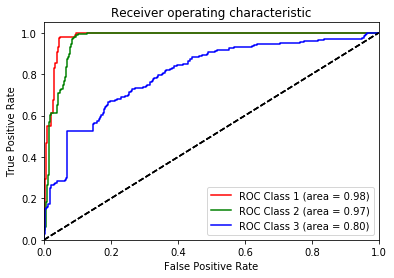

Accuracy :  0.763367463026


In [209]:
clf_baseline_0 = svm.SVC()
plot_roc_multiclass(x, x_test, y, y_test,clf_baseline_0)
clf_baseline_0.fit(x,y)
y_pred = clf_baseline_0.predict(x_test)
acc = clf_baseline_0.score(x_test,y_test)
print("Accuracy : ", acc)

In [211]:
confusion_matrix(y_test, y_pred)

array([[187,   0,   4],
       [  0, 308,  11],
       [ 18,  37, 314]])

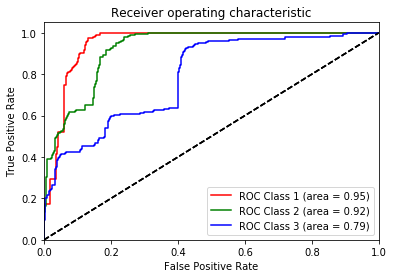

Accuracy :  0.362912400455


In [221]:
clf_baseline_0 = svm.SVC(kernel="poly")
plot_roc_multiclass(x, x_test, y, y_test,clf_baseline_0)
clf_baseline_0.fit(x,y)
y_pred = clf_baseline_0.predict(x_test)
acc = clf_baseline_0.score(x_test,y_test)
print("Accuracy : ", acc)

In [222]:
confusion_matrix(y_test, y_pred)

array([[  0, 191,   0],
       [  0, 319,   0],
       [  0, 369,   0]])

# Baseline Param tuning - All kernel
# Tuning hyper-parameters for precision_macro

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.3s finished


Best parameters set found on development set:

{'kernel': 'linear'}

Grid scores on development set:

Training Score   | Testing Score

0.924 (+/-0.007) | 0.920 (+/-0.028) for {'kernel': 'linear'}
0.807 (+/-0.017) | 0.804 (+/-0.028) for {'kernel': 'rbf'}
0.774 (+/-0.062) | 0.770 (+/-0.073) for {'kernel': 'sigmoid'}
0.136 (+/-0.000) | 0.136 (+/-0.000) for {'kernel': 'poly'}

# Tuning hyper-parameters for recall_macro

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.3s finished


Best parameters set found on development set:

{'kernel': 'linear'}

Grid scores on development set:

Training Score   | Testing Score

0.933 (+/-0.006) | 0.930 (+/-0.027) for {'kernel': 'linear'}
0.724 (+/-0.012) | 0.722 (+/-0.041) for {'kernel': 'rbf'}
0.624 (+/-0.021) | 0.617 (+/-0.039) for {'kernel': 'sigmoid'}
0.333 (+/-0.000) | 0.333 (+/-0.000) for {'kernel': 'poly'}

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.4s finished


Best parameters set found on development set:

{'kernel': 'linear'}

Grid scores on development set:

Training Score   | Testing Score

0.926 (+/-0.007) | 0.922 (+/-0.031) for {'kernel': 'linear'}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.7s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.6s finished


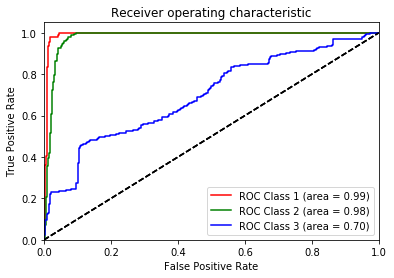

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.6s finished


0.751 (+/-0.011) | 0.749 (+/-0.032) for {'kernel': 'rbf'}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.9s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.6s finished


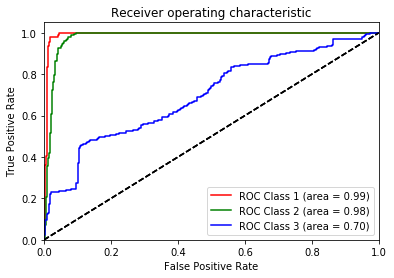

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.5s finished


0.679 (+/-0.014) | 0.674 (+/-0.027) for {'kernel': 'sigmoid'}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.9s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.8s finished


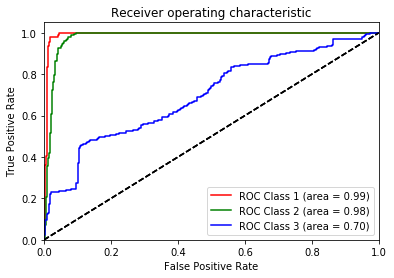

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.5s finished


0.408 (+/-0.000) | 0.408 (+/-0.001) for {'kernel': 'poly'}
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.5s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.8s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.5s finished


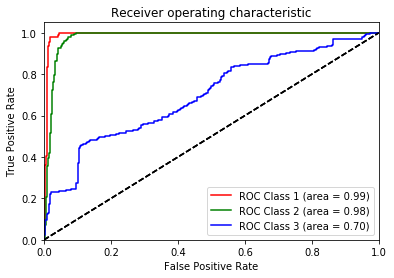

Fitting 5 folds for each of 4 candidates, totalling 20 fits



[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    7.3s finished


In [210]:
# Complete Param tuning - ALL kernel
grid_eval_metric_baseline = ['precision_macro','recall_macro','accuracy']

# Set the parameters by cross-validation
tuned_parameters_baseline = [
                    {'kernel': ['linear']},
                    {'kernel': ['rbf']},
                    {'kernel': ['sigmoid']},
                    {'kernel': ['poly']}
                   ]

print("# Baseline Param tuning - All kernel")
for score in grid_eval_metric_baseline:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_tune_baseline = model_selection.GridSearchCV(svm.SVC(), tuned_parameters_baseline, cv=5,
                       scoring='%s' % score, verbose=True)
    clf_tune_baseline.fit(x,y)
    print("Best parameters set found on development set:")
    print()
    print(clf_tune_baseline.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print("Training Score   | Testing Score")
    print()
    means_baseline = clf_tune_baseline.cv_results_['mean_test_score']
    stds_baseline = clf_tune_baseline.cv_results_['std_test_score']
    means_train_baseline = clf_tune_baseline.cv_results_['mean_train_score']
    stds_train_baseline = clf_tune_baseline.cv_results_['std_train_score']
    for mean_t, std_t, mean, std, params in zip(means_train_baseline, stds_train_baseline, means_baseline, stds_baseline, clf_tune_baseline.cv_results_['params']):
        print("%0.3f (+/-%0.03f) | %0.3f (+/-%0.03f) for %r"
              % (mean_t, std_t * 2, mean, std * 2, params))
        if(score == "accuracy"):
            plot_roc_multiclass(x, x_test, y, y_test,clf_tune_baseline)
            clf_tune_baseline.fit(x,y)
            y_pred = clf_tune_baseline.predict(x_test)
            confusion_matrix(y_test, y_pred)
    print()

# Feature Engineering Techniques

In [15]:
#Feature Engineering using RFECV 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

clf1= svm.SVC(kernel='linear')
rfecv = RFECV(estimator=clf1, step=1, cv=StratifiedKFold(2),
              scoring='accuracy', verbose=True)
rfecv.fit(x_org, y_org)
rfecv

Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.


RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=True)

Optimal number of features : 18


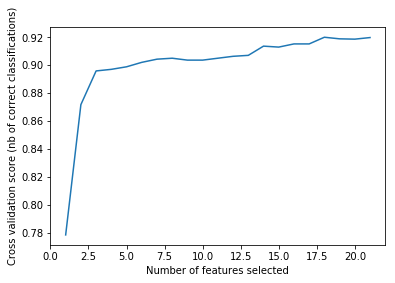

In [16]:
print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [17]:
rfecv.n_features_ 

18

In [18]:
rfecv.support_ 

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True], dtype=bool)

In [19]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 2, 1])

In [190]:
#Reduced features - reducing from 21 to 18 features, deemed important by rfecv
x_reduced = x
x_reduced = x_reduced.drop("I131.treatment",1)
x_reduced = x_reduced.drop("hypopituitary",1)
x_reduced = x_reduced.drop("T4U",1)
x_reduced.head()

x_test_reduced = x_test
x_test_reduced = x_test_reduced.drop("I131.treatment",1)
x_test_reduced = x_test_reduced.drop("hypopituitary",1)
x_test_reduced = x_test_reduced.drop("T4U",1)
x_test_reduced.head()

,Age,Sex,on.thyroxine,query.on.thyroxine,on.antithyroid.medication,sick,pregnant,thyroid.surgery,query.hypothyroid,query.hyperthyroid,lithium,goitre,tumor,psych,TSH,T3,TT4,FTI
4058,0.118943,0,0,0,0,0,0,0,0,0,0,0,0,0,0.080402,0.272727,0.308411,0.277354
315,0.151982,0,0,0,0,0,0,0,0,0,0,0,0,0,0.020101,0.090909,0.245327,0.236641
3093,0.057269,0,0,0,0,0,0,0,0,0,0,0,0,0,0.005025,0.363636,0.404206,0.239186
3198,0.079295,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.272727,0.207944,0.203562
2813,0.094714,0,0,0,0,0,0,0,0,1,0,0,1,0,0.000000,0.272727,0.331776,0.284987


# Parameter Tuning

In [175]:
from matplotlib.colors import Normalize

# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


In [176]:
grid_eval_metric = ['accuracy']

# Complete Param tuning - LINEAR kernel
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed: 13.5min finished


Best parameters set found on development set:

{'C': 100000, 'kernel': 'linear'}

Grid scores on development set:

Training Score   | Testing Score

0.924 (+/-0.003) | 0.921 (+/-0.033) for {'C': 1, 'kernel': 'linear'}
0.944 (+/-0.004) | 0.942 (+/-0.023) for {'C': 10, 'kernel': 'linear'}
0.952 (+/-0.004) | 0.950 (+/-0.028) for {'C': 100, 'kernel': 'linear'}
0.952 (+/-0.004) | 0.950 (+/-0.028) for {'C': 1000, 'kernel': 'linear'}
0.953 (+/-0.004) | 0.950 (+/-0.029) for {'C': 10000, 'kernel': 'linear'}
0.953 (+/-0.004) | 0.950 (+/-0.030) for {'C': 100000, 'kernel': 'linear'}
0.955 (+/-0.005) | 0.950 (+/-0.028) for {'C': 1000000, 'kernel': 'linear'}

# Train & Test Accuracy Plot


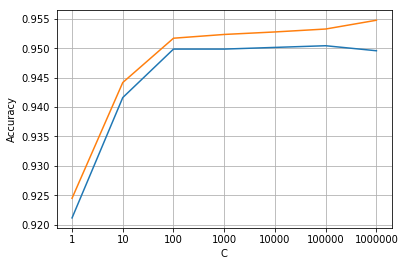

In [177]:
# Complete Param tuning - LINEAR kernel
print("# Complete Param tuning - LINEAR kernel")
# Set the parameters by cross-validation
tuned_parameters_linear = [
                    {'kernel': ['linear'], 'C': [1, 10,100, 1000, 10000,100000,1000000]}
                   ]

for score in grid_eval_metric:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_tune_linear = model_selection.GridSearchCV(svm.SVC(), tuned_parameters_linear, cv=5,
                       scoring='%s' % score, verbose=True)
    clf_tune_linear.fit(x_reduced,y)
    print("Best parameters set found on development set:")
    print()
    print(clf_tune_linear.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print("Training Score   | Testing Score")
    print()
    means_linear = clf_tune_linear.cv_results_['mean_test_score']
    stds = clf_tune_linear.cv_results_['std_test_score']
    means_linear_train = clf_tune_linear.cv_results_['mean_train_score']
    stds_train = clf_tune_linear.cv_results_['std_train_score']
    for mean_t, std_t, mean, std, params in zip(means_linear_train, stds_train, means_linear, stds, clf_tune_linear.cv_results_['params']):
        print("%0.3f (+/-%0.03f) | %0.3f (+/-%0.03f) for %r"
              % (mean_t, std_t, mean, std * 2, params))
    print()
    
C_linear = [1, 10,100, 1000, 10000,100000,1000000]

print("# Train & Test Accuracy Plot")
plt.xticks(range(len(means_linear)), C_linear)
plt.plot(means_linear, label="Test")
plt.plot(means_linear_train, label="Train")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

# Complete Param tuning - LINEAR kernel - 02
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    5.5s finished


Best parameters set found on development set:

{'C': 250, 'kernel': 'linear'}

Grid scores on development set:

Training Score   | Testing Score

0.952 (+/-0.008) | 0.950 (+/-0.028) for {'C': 100, 'kernel': 'linear'}
0.952 (+/-0.008) | 0.950 (+/-0.027) for {'C': 125, 'kernel': 'linear'}
0.952 (+/-0.007) | 0.950 (+/-0.027) for {'C': 150, 'kernel': 'linear'}
0.952 (+/-0.007) | 0.950 (+/-0.028) for {'C': 250, 'kernel': 'linear'}
0.952 (+/-0.007) | 0.950 (+/-0.028) for {'C': 500, 'kernel': 'linear'}
0.952 (+/-0.008) | 0.950 (+/-0.028) for {'C': 750, 'kernel': 'linear'}
0.952 (+/-0.008) | 0.950 (+/-0.028) for {'C': 1000, 'kernel': 'linear'}

# Train & Test Accuracy Plot


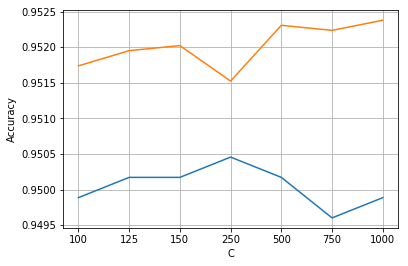

In [180]:
# We see that for C=100 to 1000 there is a rise in accuracy after which accuracy stabilises
# Therefore, we check for accuracy values for C ranging 100 to 1000 for a better understanding

# Complete Param tuning - LINEAR kernel - 02
print("# Complete Param tuning - LINEAR kernel - 02")
# Set the parameters by cross-validation
tuned_parameters_linear_02 = [
                    {'kernel': ['linear'], 'C': [100, 125, 150, 250, 500, 750, 1000]}
                   ]

for score in grid_eval_metric:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_tune_linear_02 = model_selection.GridSearchCV(svm.SVC(), tuned_parameters_linear_02, cv=5,
                       scoring='%s' % score, verbose=True)
    clf_tune_linear_02.fit(x_reduced,y)
    print("Best parameters set found on development set:")
    print()
    print(clf_tune_linear_02.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print("Training Score   | Testing Score")
    print()
    means_linear_02 = clf_tune_linear_02.cv_results_['mean_test_score']
    stds = clf_tune_linear_02.cv_results_['std_test_score']
    means_linear_02_train = clf_tune_linear_02.cv_results_['mean_train_score']
    stds_train = clf_tune_linear_02.cv_results_['std_train_score']
    for mean_t, std_t, mean, std, params in zip(means_linear_02_train, stds_train, means_linear_02, stds, clf_tune_linear_02.cv_results_['params']):
        print("%0.3f (+/-%0.03f) | %0.3f (+/-%0.03f) for %r"
              % (mean_t, std_t * 2, mean, std * 2, params))
    print()
    
C_linear_02 = [100, 125, 150, 250, 500, 750, 1000]

print("# Train & Test Accuracy Plot")
#plt.scatter(C_linear_02,Acc_linear_02)
plt.xticks(range(len(means_linear_02)), C_linear_02)
plt.plot(means_linear_02, label="Test")
plt.plot(means_linear_02_train, label="Train")
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [181]:
# Complete Param tuning - RBF kernel

# Set the parameters by cross-validation
C_range = [1, 10, 25, 50,100, 1000, 10000,100000,1000000]
gamma_range = [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
tuned_parameters_rbf = [
                    {'kernel': ['rbf'], 'gamma': gamma_range, 'C': C_range}
                   ]

print("# Complete Param tuning - RBF kernel")
for score in grid_eval_metric:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_tune_rbf = model_selection.GridSearchCV(svm.SVC(), tuned_parameters_rbf, cv=5,
                       scoring='%s' % score, verbose=True)
    clf_tune_rbf.fit(x_reduced,y)
    print("Best parameters set found on development set:")
    print()
    print(clf_tune_rbf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print("Training Score   | Testing Score")
    print()
    means_rbf = clf_tune_rbf.cv_results_['mean_test_score']
    stds_rbf = clf_tune_rbf.cv_results_['std_test_score']
    means_rbf_train = clf_tune_rbf.cv_results_['mean_train_score']
    stds_rbf_train = clf_tune_rbf.cv_results_['std_train_score']
    for mean_t, std_t, mean, std, params in zip(means_rbf_train, stds_rbf_train, means_rbf, stds_rbf, clf_tune_rbf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) | %0.3f (+/-%0.03f) for %r"
              % (mean_t, std_t * 2, mean, std * 2, params))
    print()


# Complete Param tuning - RBF kernel
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  4.1min finished


Best parameters set found on development set:

{'C': 25, 'gamma': 100, 'kernel': 'rbf'}

Grid scores on development set:

Training Score   | Testing Score

0.982 (+/-0.002) | 0.974 (+/-0.013) for {'C': 1, 'gamma': 100, 'kernel': 'rbf'}
0.960 (+/-0.002) | 0.954 (+/-0.012) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.944 (+/-0.002) | 0.940 (+/-0.015) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.912 (+/-0.007) | 0.912 (+/-0.026) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.576 (+/-0.016) | 0.575 (+/-0.019) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.500 (+/-0.022) | 0.499 (+/-0.030) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.408 (+/-0.000) | 0.408 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.408 (+/-0.000) | 0.408 (+/-0.001) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.408 (+/-0.000) | 0.408 (+/-0.001) for {'C': 1, 'gamma': 1e-06, 'kernel': 'rbf'}
0.991 (+/-0.002) | 0.978 (+/-0.011) for {'C': 10, 'gamma': 100, 'kernel': 'rbf'}
0.978 (+/-0.004) | 0.969 (+/-0.016) 

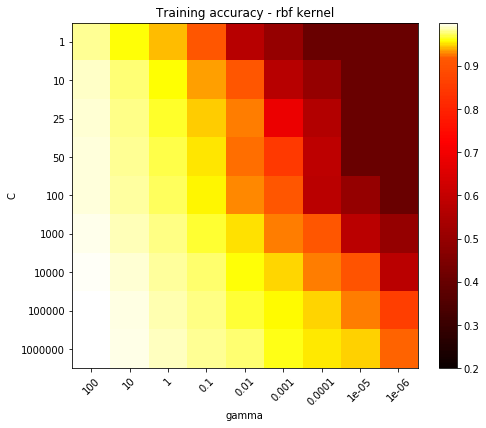

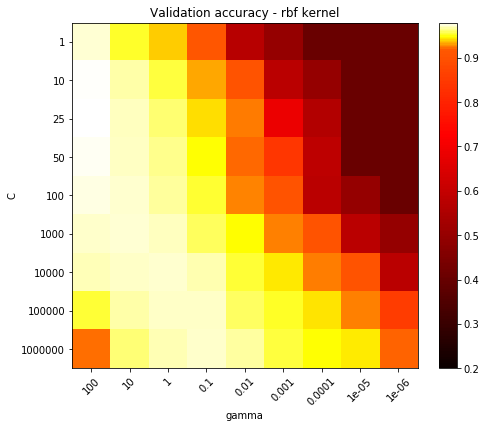

In [182]:
#heatmap for rbf kernel
scores_rbf = means_rbf.reshape(len(C_range),len(gamma_range))
scores_rbf_train = means_rbf_train.reshape(len(C_range),len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_rbf_train, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Training accuracy - rbf kernel')
plt.show()

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_rbf, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy - rbf kernel')
plt.show()

In [183]:
# Complete Param tuning - sigmoid kernel

# Set the parameters by cross-validation
C_sigmoid = [1, 10, 25, 50,100, 1000, 10000,100000,1000000]
gamma_sigmoid = [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
tuned_parameters_sigmoid = [
                    {'kernel': ['sigmoid'], 'gamma': gamma_sigmoid, 'C': C_sigmoid}
                   ]

print("# Complete Param tuning - SIGMOID kernel")
for score in grid_eval_metric:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_tune_sigmoid = model_selection.GridSearchCV(svm.SVC(), tuned_parameters_sigmoid, cv=5,
                       scoring='%s' % score, verbose=True)
    clf_tune_sigmoid.fit(x_reduced,y)
    print("Best parameters set found on development set:")
    print()
    print(clf_tune_sigmoid.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print("Training Score   | Testing Score")
    print()
    means_sigmoid = clf_tune_sigmoid.cv_results_['mean_test_score']
    stds_sigmoid = clf_tune_sigmoid.cv_results_['std_test_score']
    means_sigmoid_train = clf_tune_sigmoid.cv_results_['mean_train_score']
    stds_sigmoid_train = clf_tune_sigmoid.cv_results_['std_train_score']
    for mean_t, std_t, mean, std, params in zip(means_sigmoid_train, stds_sigmoid_train, means_sigmoid, stds_sigmoid, clf_tune_sigmoid.cv_results_['params']):
        print("%0.3f (+/-%0.03f) | %0.3f (+/-%0.03f) for %r"
              % (mean_t, std_t, mean, std * 2, params))
    print()


# Complete Param tuning - SIGMOID kernel
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters set found on development set:

{'C': 100000, 'gamma': 0.001, 'kernel': 'sigmoid'}

Grid scores on development set:

Training Score   | Testing Score

0.408 (+/-0.000) | 0.408 (+/-0.001) for {'C': 1, 'gamma': 100, 'kernel': 'sigmoid'}
0.269 (+/-0.109) | 0.269 (+/-0.190) for {'C': 1, 'gamma': 10, 'kernel': 'sigmoid'}
0.698 (+/-0.007) | 0.696 (+/-0.067) for {'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}
0.848 (+/-0.010) | 0.844 (+/-0.029) for {'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid'}
0.585 (+/-0.014) | 0.587 (+/-0.050) for {'C': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}
0.408 (+/-0.000) | 0.408 (+/-0.001) for {'C': 1, 'gamma': 0.001, 'kernel': 'sigmoid'}
0.408 (+/-0.000) | 0.408 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'sigmoid'}
0.408 (+/-0.000) | 0.408 (+/-0.001) for {'C': 1, 'gamma': 1e-05, 'kernel': 'sigmoid'}
0.408 (+/-0.00

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  2.6min finished


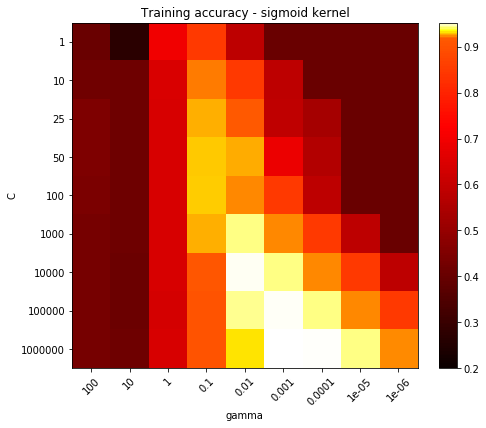

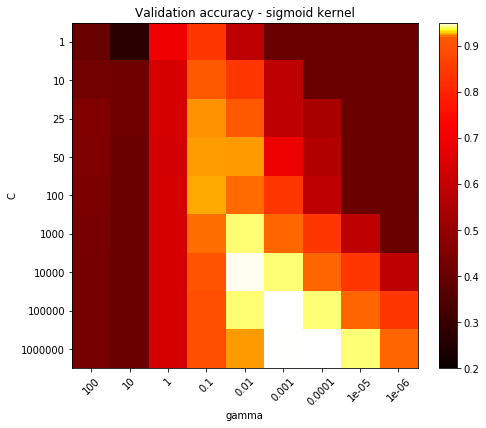

In [184]:
#heatmap for sigmoid kernel
scores_sigmoid = means_sigmoid.reshape(len(C_sigmoid),len(gamma_sigmoid))
scores_sigmoid_train = means_sigmoid_train.reshape(len(C_sigmoid),len(gamma_sigmoid))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_sigmoid_train, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_sigmoid)), gamma_sigmoid, rotation=45)
plt.yticks(np.arange(len(C_sigmoid)), C_sigmoid)
plt.title('Training accuracy - sigmoid kernel')
plt.show()

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_sigmoid, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_sigmoid)), gamma_sigmoid, rotation=45)
plt.yticks(np.arange(len(C_sigmoid)), C_sigmoid)
plt.title('Validation accuracy - sigmoid kernel')
plt.show()

In [ ]:
# Complete Param tuning - RBF kernel

# Set the parameters by cross-validation
C_range = [1, 10, 25, 50,100, 1000, 10000,100000,1000000]
gamma_range = [100, 10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
tuned_parameters_rbf = [
                    {'kernel': ['poly'], 'gamma': gamma_range, 'C': C_range}
                   ]

print("# Complete Param tuning - poly kernel")
for score in grid_eval_metric:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_tune_rbf = model_selection.GridSearchCV(svm.SVC(), tuned_parameters_rbf, cv=5,
                       scoring='%s' % score, verbose=True)
    clf_tune_rbf.fit(x_reduced,y)
    print("Best parameters set found on development set:")
    print()
    print(clf_tune_rbf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print("Training Score   | Testing Score")
    print()
    means_rbf = clf_tune_rbf.cv_results_['mean_test_score']
    stds_rbf = clf_tune_rbf.cv_results_['std_test_score']
    means_rbf_train = clf_tune_rbf.cv_results_['mean_train_score']
    stds_rbf_train = clf_tune_rbf.cv_results_['std_train_score']
    for mean_t, std_t, mean, std, params in zip(means_rbf_train, stds_rbf_train, means_rbf, stds_rbf, clf_tune_rbf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) | %0.3f (+/-%0.03f) for %r"
              % (mean_t, std_t * 2, mean, std * 2, params))
    print()



# Complete Param tuning - poly kernel
# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 81 candidates, totalling 405 fits


# Model Evaluations for based on GridSearchCV results

WE CLOSELY EVALUATE ALL THE MODELS FOR WHICH WE GOT HIGH ACCURACY - BY CHECKING THE PARAM TRADEOFF

SVM Evaluation For Linear Kernel

0.952 (+/-0.007) | 0.950 (+/-0.028) for {'C': 250, 'kernel': 'linear'}
0.952 (+/-0.004) | 0.950 (+/-0.028) for {'C': 100, 'kernel': 'linear'}
0.952 (+/-0.004) | 0.950 (+/-0.028) for {'C': 1000, 'kernel': 'linear'}
0.953 (+/-0.004) | 0.950 (+/-0.029) for {'C': 10000, 'kernel': 'linear'}
0.953 (+/-0.004) | 0.950 (+/-0.030) for {'C': 100000, 'kernel': 'linear'}
0.955 (+/-0.005) | 0.950 (+/-0.028) for {'C': 1000000, 'kernel': 'linear'}


# C-Accuracy Plot - Linear kernel - Scaled


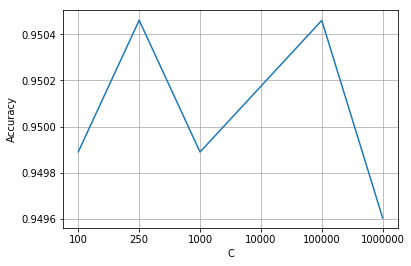

In [187]:
clf1 = svm.SVC(kernel='linear', C=100)
clf2 = svm.SVC(kernel='linear', C=250)
clf3 = svm.SVC(kernel='linear', C=1000)
clf4 = svm.SVC(kernel='linear', C=10000)
clf5 = svm.SVC(kernel='linear', C=100000)
clf6 = svm.SVC(kernel='linear', C=1000000)

Acc_linear = [ cross_val_score(clf1, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf2, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf3, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf4, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf5, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf6, x_reduced, y, cv=5).mean()
               ]

#Visualize
print("# C-Accuracy Plot - Linear kernel - Scaled")
C_linear = ['100','250','1000','10000','100000','1000000']
plt.xticks(range(len(Acc_linear)), C_linear)
plt.plot(Acc_linear)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

SVM Evaluation For RBF Kernel

# C-Accuracy Plot - rbf kernel


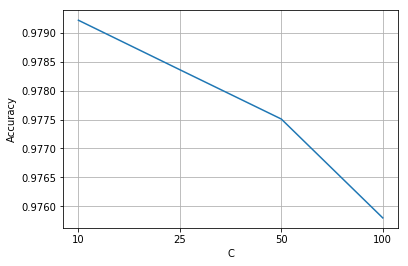

In [188]:
clf1 = svm.SVC(kernel='rbf', C=25, gamma=100)
clf2 = svm.SVC(kernel='rbf', C=10, gamma=100)
clf3 = svm.SVC(kernel='rbf', C=50, gamma=100)
clf4 = svm.SVC(kernel='rbf', C=100, gamma=100)
Acc_linear = [ cross_val_score(clf1, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf2, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf3, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf4, x_reduced, y, cv=5).mean()
               ]

#Visualize
print("# C-Accuracy Plot - rbf kernel")
C_linear = ['10','25','50','100']
plt.xticks(range(len(Acc_linear)), C_linear)
plt.plot(Acc_linear)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


SVM Evaluation For sigmoid Kernel

# C-Accuracy Plot - rbf kernel


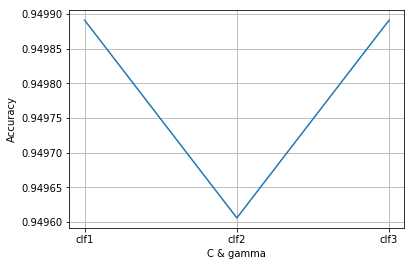

In [189]:
clf1 = svm.SVC(kernel='sigmoid', C=100000, gamma=0.001)
clf2 = svm.SVC(kernel='sigmoid', C=1000000, gamma=0.001)
clf3 = svm.SVC(kernel='sigmoid', C=1000000, gamma=0.0001)
Acc_linear = [ cross_val_score(clf1, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf2, x_reduced, y, cv=5).mean(),
                 cross_val_score(clf3, x_reduced, y, cv=5).mean(),
               ]

#Visualize
print("# C-Accuracy Plot - rbf kernel")
C_linear = ['clf1','clf2','clf3']
plt.xticks(range(len(Acc_linear)), C_linear)
plt.plot(Acc_linear)
plt.xlabel('C & gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


# Determining the best model

0.943117178612
0.9795221843
0.941979522184

# C-Accuracy Plot


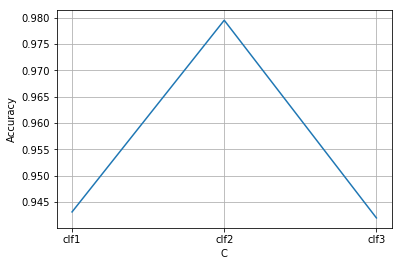

# Complete Param tuning - All kernel
# Tuning hyper-parameters for precision_macro

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished


Best parameters set found on development set:

{'C': 25, 'gamma': 100, 'kernel': 'rbf'}

Grid scores on development set:

Training Score   | Testing Score

0.960 (+/-0.002) | 0.940 (+/-0.009) for {'C': 250, 'kernel': 'linear'}
0.996 (+/-0.006) | 0.955 (+/-0.019) for {'C': 25, 'gamma': 100, 'kernel': 'rbf'}
0.953 (+/-0.006) | 0.937 (+/-0.013) for {'C': 100000, 'gamma': 0.001, 'kernel': 'sigmoid'}

# Tuning hyper-parameters for recall_macro

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters set found on development set:

{'C': 25, 'gamma': 100, 'kernel': 'rbf'}

Grid scores on development set:

Training Score   | Testing Score

0.967 (+/-0.002) | 0.949 (+/-0.009) for {'C': 250, 'kernel': 'linear'}
0.997 (+/-0.006) | 0.956 (+/-0.015) for {'C': 25, 'gamma': 100, 'kernel': 'rbf'}
0.962 (+/-0.005) | 0.948 (+/-0.014) for {'C': 100000, 'gamma': 0.001, 'kernel': 'sigmoid'}

# Tuning hyper-parameters for accuracy

Fitting 3 folds for each of 3 candidates, totalling 9 fit

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished


In [223]:
# Complete Param tuning - ALL kernel
grid_eval_metric_final = ['precision_macro', 'recall_macro','accuracy']

# Set the parameters by cross-validation (using Good candidates for final evaluation)
tuned_parameters_rbf = [
                    {'C': [250], 'kernel': ['linear']},
                    {'C': [25], 'gamma': [100], 'kernel': ['rbf']},
                    {'C': [100000], 'gamma': [0.001], 'kernel': ['sigmoid']}
                   ]

clf1 = svm.SVC(kernel='linear', C=250)
clf2 = svm.SVC(kernel='rbf', C=25, gamma=100)
clf3 = svm.SVC(kernel='sigmoid', C=100000, gamma=0.001)

clf1.fit(x_reduced, y)
clf2.fit(x_reduced, y)
clf3.fit(x_reduced, y)

acc1 = clf1.score(x_test_reduced,y_test)
acc2 = clf2.score(x_test_reduced,y_test)
acc3 = clf3.score(x_test_reduced,y_test)

print(acc1)
print(acc2)
print(acc3)
print()

#Visualize
print("# C-Accuracy Plot")
C_linear = ['clf1','clf2','clf3']
Acc_linear = [acc1,acc2,acc3]
plt.xticks(range(len(Acc_linear)), C_linear)
plt.plot(Acc_linear)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


print("# Complete Param tuning - All kernel")
for score in grid_eval_metric_final:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_tune_final = model_selection.GridSearchCV(svm.SVC(), tuned_parameters_rbf,
                       scoring='%s' % score, verbose=True)
    clf_tune_final.fit(x_test_reduced,y_test)
    print("Best parameters set found on development set:")
    print()
    print(clf_tune_final.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    print("Training Score   | Testing Score")
    print()
    means_final = clf_tune_final.cv_results_['mean_test_score']
    stds_final = clf_tune_final.cv_results_['std_test_score']
    means_train_final = clf_tune_final.cv_results_['mean_train_score']
    stds_train_final = clf_tune_final.cv_results_['std_train_score']
    for mean_t, std_t, mean, std, params in zip(means_train_final, stds_train_final, means_final, stds_final, clf_tune_final.cv_results_['params']):
        print("%0.3f (+/-%0.03f) | %0.3f (+/-%0.03f) for %r"
              % (mean_t, std_t * 2, mean, std * 2, params))
    print()

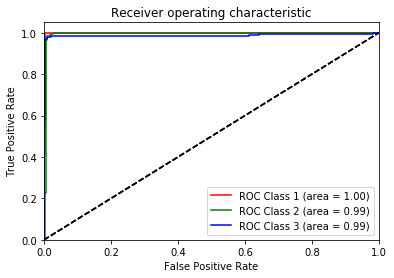

Accuracy :  0.9795221843


In [237]:
# roc plot for optimised rbf kernel 
plot_roc_multiclass(x_reduced, x_test_reduced, y, y_test,clf2)
clf2.fit(x_reduced,y)
acc = clf2.score(x_test_reduced,y_test)
y_pred = clf2.predict(x_test_reduced)
print("Accuracy : ", acc)

In [238]:
confusion_matrix(y_test, y_pred)

array([[191,   0,   0],
       [  0, 317,   2],
       [  3,  13, 353]])

THE BEST SVM PARAMS FOR THE DATASET : {'C': [25], 'gamma': [100], 'kernel': ['rbf']}

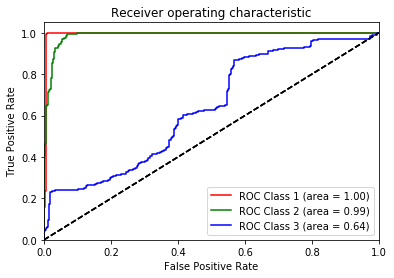

Accuracy :  0.943117178612


In [235]:
# roc plot for optimised linear kernel 
plot_roc_multiclass(x_reduced, x_test_reduced, y, y_test,clf1)
clf1.fit(x_reduced,y)
y_pred = clf1.predict(x_test_reduced)
acc = clf1.score(x_test_reduced,y_test)
print("Accuracy : ", acc)

In [236]:
confusion_matrix(y_test, y_pred)

array([[191,   0,   0],
       [  0, 311,   8],
       [  7,  35, 327]])

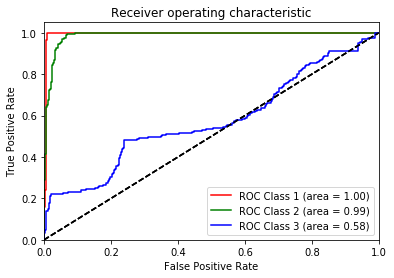

Accuracy :  0.941979522184


In [240]:
# roc plot for optimised sigmoid kernel 
plot_roc_multiclass(x_reduced, x_test_reduced, y, y_test,clf3)
clf3.fit(x_reduced,y)
acc = clf3.score(x_test_reduced,y_test)
print("Accuracy : ", acc)

In [241]:
confusion_matrix(y_test, y_pred)

array([[191,   0,   0],
       [  0, 317,   2],
       [  3,  13, 353]])